# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [115]:
from scipy import stats;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean = 50, standard_deviation = 5 and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [116]:
# Variables
mu = 50;
sigma = 5;
sample_size = [20, 50, 200, 10000]

# Distributions & Tests
dists = [np.random.normal(mu, sigma, size) for size in sample_size]
tests = [stats.normaltest(dist) for dist in dists]

# Show tests
tests

[NormaltestResult(statistic=1.6386607364578127, pvalue=0.4407266803031509),
 NormaltestResult(statistic=2.479636808688539, pvalue=0.28943677362766324),
 NormaltestResult(statistic=0.10412473885892795, pvalue=0.9492696595894714),
 NormaltestResult(statistic=0.36073305870682193, pvalue=0.834964116460579)]

#### Interpret the normaltest results and make your observations.

`Comments:`
When np.random.normal size is small, we can obtain a p-value is very little, but when we
have a big sample size the p-value is much bigger

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](images/ch-1.png)

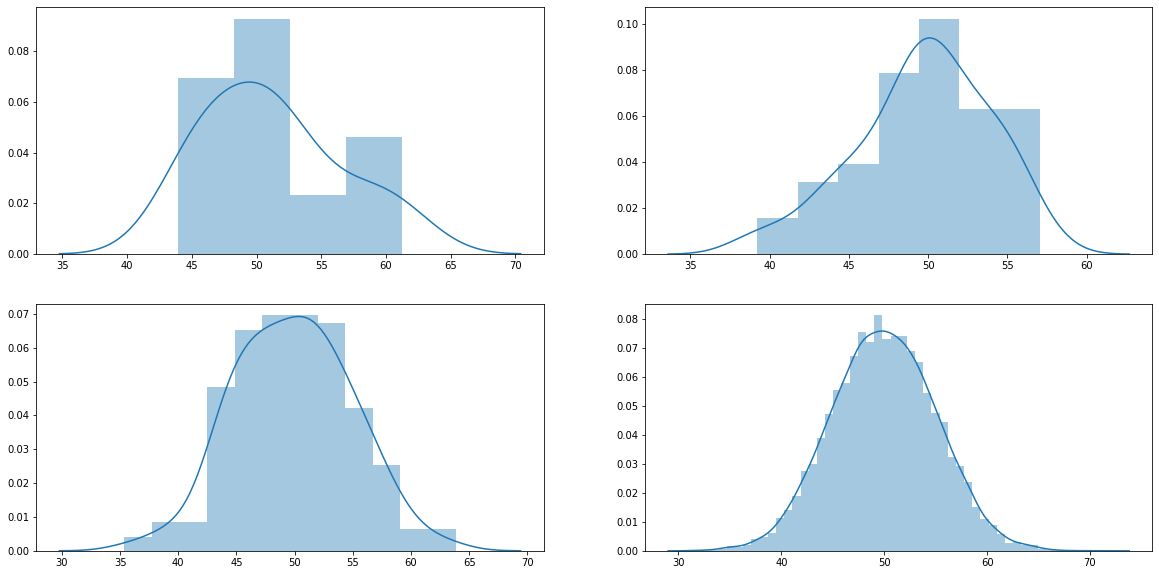

In [117]:
# Create figure and axes

fig, axs = plt.subplots()

fig.set_size_inches(20,10)

plt.subplot(221)
sns.distplot(dists[0])
plt.subplot(222)
sns.distplot(dists[1])
plt.subplot(223)
sns.distplot(dists[2])
plt.subplot(224)
sns.distplot(dists[3])


#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

`Comments:`


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](images/ch-2.png)

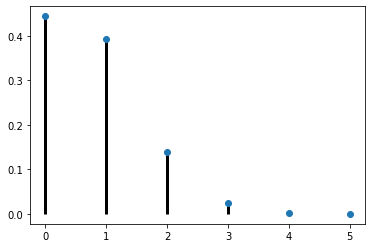

In [118]:
# Variables 
p = 0.15
n = 5

x = range(n+1)
f_x = stats.binom(n,p)

plt.plot()
# Binomial distribution
plt.plot(x, f_x.pmf(x), 'o')

plt.vlines(x,0,f_x.pmf(x), lw = 3)
# Plot line + bullet point -> Discrete Distribution Representation


#### Explain what you observe from the plot above.

`Comments:`



#### Now plot PMP with 50, 500, and 5000 visitors.

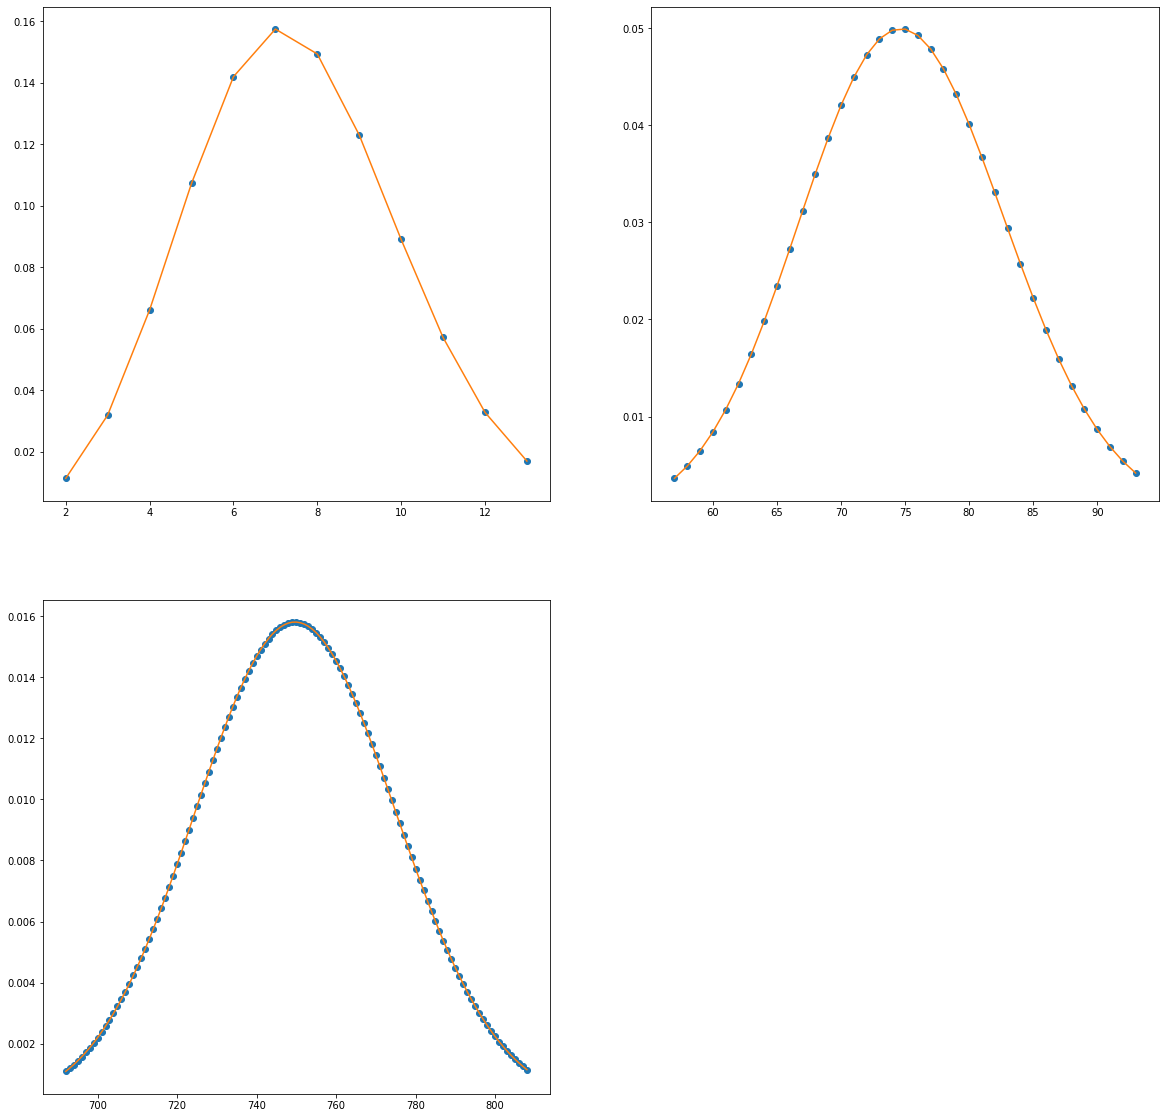

In [119]:
# Create figure and axes
fig, axs = plt.subplots()

fig.set_size_inches(20,20)

plt.subplot(221)
a = stats.binom(50,0.15)
x = np.arange(a.ppf(0.01),a.ppf(0.99))
plt.plot(x, a.pmf(x), 'o', x, a.pmf(x), '-')

plt.subplot(222)
a = stats.binom(500,0.15)
x = np.arange(a.ppf(0.01),a.ppf(0.99))
plt.plot(x, a.pmf(x), 'o', x, a.pmf(x), '-')

plt.subplot(223)
a = stats.binom(5000,0.15)
x = np.arange(a.ppf(0.01),a.ppf(0.99))
plt.plot(x, a.pmf(x), 'o', x, a.pmf(x), '-')



# Variables


# Plot each PMF
# For visualization reasons, the next discrete distributions are represented using continuous lines


#### What did you notice from the distribution plots? Comment your findings.

`Comments:`


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

`Comments:`<br/>


#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [120]:
# Variables
mu = 300
visits = 320

# Probability
f_x = stats.poisson(mu)

f_x.pmf(320)


0.011612348610402475

#### What is the probability of getting 60 visits?

In [121]:
# Variables
visits = 60

# Probability
f_x.pmf(visits)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](images/ch-3.png)

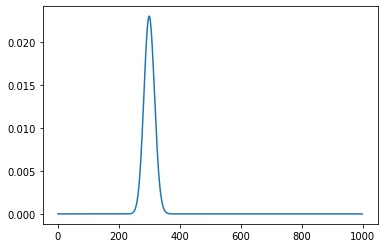

In [122]:
# Variables
visits = range(1000)
f_visits = [f_x.pmf(i) for i in visits]
# Plot of the distribution
plt.plot(visits, f_visits, '-')

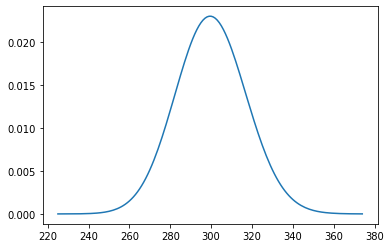

In [123]:
visits = range(225,375)
f_visits = [f_x.pmf(i) for i in visits]
# Plot of the distribution
plt.plot(visits, f_visits, '-')

# Challenge 4 - Central Limit Theorem
#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [138]:
# Variables
mean = 35
std = 8


# Probability
f_x = stats.norm(loc=mean, scale=std)
f_x.cdf(35)-f_x.cdf(30)

0.23401447095129946

#### b. What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [146]:
# Variables
mean =35
std = 8
mean_sample = 115*60/200


z = ((mean_sample - mean)/std)*math.sqrt(200)

print(stats.norm.sf(z))

# Probability
f_x.sf(mean+z*std)

0.8116204410942089


0.8116204410942089

# Challenge 5 - Normal Variables 

The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40. 

<div align="center">$X → N(200,40)$</div>

#### 1. Find the probability that the monthly sales are more than 300. 

In [147]:
# Variables
mu = 200
sigma = 40

f_x = stats.norm(loc=mu, scale= sigma)

print(1-f_x.cdf(300))

# Probability
f_x.sf(300)

0.006209665325776159


0.006209665325776132

#### 2. Find the probability that the monthly sales fall between 160 and 240.

In [127]:
# Probability
f_x.cdf(240)-f_x.cdf(160)

0.6826894921370859

#### 3. Find the probability that the monthly sales do not exceed 150.

In [128]:
# Probability
f_x.cdf(150)

0.10564977366685535

#### 4. Find the probability that the monthly sales exceed 3000. 

In [149]:
# Probability
print(1- f_x.cdf(3000))
f_x.sf(3000)

0.0


0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4. Find the following probabilities.
#### 1.The probability that in a particular month there is no violent robbery.

In [151]:
# Variables
mu = 4

# Probability
g_x = stats.poisson(mu)
g_x.pmf(0)

0.01831563888873418

#### 2. The probability that there are at least 1 in a given month. 

In [153]:
# Probability
g_x.sf(0)

0.9816843611112658

#### 3. The probability that there are between 2 and 6 (inclusive) in a given month.

In [166]:
# Probability
print(g_x.cdf(6) - g_x.cdf(1)) # 2 inclusive
print(g_x.cdf(6) - g_x.cdf(2)) # 2 not inclusive

0.7977478271537555
0.6512227160438819


#### 4. The probability that there more than two in 15 days.  

In [187]:
# Probability
mu = 4/2
g_x = stats.poisson(mu)
g_x.sf(2)

0.32332358381693654